# The `Optim.jl` Package

While building our own gradient descent and Newton methods is great for learning, practical applications require professional, optimized tools. In Julia, the `Optim.jl` package provides several high-performance optimizers.

It saves us from having to manually implement:
* Robust line searches (e.g., Wolfe conditions)
* Hessian approximations (quasi-Newton methods)
* Trust-region methods
* Stopping criteria (convergence checks)

We can simply provide our objective function `f` and, optionally, our gradient `g` and Hessian `h`. `Optim.jl` will then select an appropriate powerful algorithm to find the minimum.

In [1]:
using Optim, Plots

# First include all functions from the previous section
using NBInclude
@nbinclude("Gradient_Based_Optimization.ipynb");

Path 1: Length=501, ||gradient|| = 1.4715843307921153
Path 2: Length=67, ||gradient|| = 8.918594790414185e-5
Path 3: Length=501, ||gradient|| = 1.7575802156689104
Path 1: Length=47, ||gradient|| = 7.870693265014514e-5
Path 2: Length=19, ||gradient|| = 2.707659519760321e-5
Path 3: Length=34, ||gradient|| = 6.996634619625889e-5
Path 1: Length=47, ||gradient|| = 7.870696143799702e-5
Path 2: Length=19, ||gradient|| = 2.7076774319819133e-5
Path 3: Length=34, ||gradient|| = 6.996618451764213e-5
Path 1: Length=5, ||gradient|| = 2.4554302167287822e-6
Path 2: Length=4, ||gradient|| = 1.2227294235742997e-5
Path 3: Length=6, ||gradient|| = 1.75484871960624e-8


### Method 1: Derivative-Free Optimization

In the simplest case, we can provide *only* the function `f` and a starting point `x0`. 

`Optim.jl` will automatically select a **0-th order (derivative-free)** method, like `Nelder-Mead`. This is a great option when your function's gradient is unknown, complex, or undefined.

In [2]:
# Our starting point
x0 = [0.0, 1.0]

# Call optimize with only the function and start point
result_nm = optimize(f, x0)

# The output shows it found a minimum using the Nelder-Mead algorithm.

 * Status: success

 * Candidate solution
    Final objective value:     -2.072854e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    34
    f(x) calls:    66


### Method 2: First-Order (Gradient) Optimization

If we provide the gradient, `Optim.jl` can use a much more powerful **1st-order method**. It will automatically select `L-BFGS`, a famous *quasi-Newton* method. This is like our gradient descent, but it cleverly builds an *approximation* of the Hessian using only gradient information, making it converge much faster.

In [3]:
# Define our gradient function (using our numerical version)
g(x) = finite_difference_gradient(f, x)

# Call optimize with f, g, and x0
result_lbfgs = optimize(f, g, x0; inplace=false)

# The output shows it used L-BFGS and took far fewer iterations than Nelder-Mead.

 * Status: success

 * Candidate solution
    Final objective value:     -1.000000e+00

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 4.31e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 8.04e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.36e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.36e-11 ≰ 0.0e+00
    |g(x)|                 = 6.88e-10 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    7
    f(x) calls:    20
    ∇f(x) calls:   20


### Method 3: Second-Order (Hessian) Optimization

If we can provide the Hessian, `Optim.jl` will use a full **2nd-order method**, like `NewtonTrustRegion`. This is a robust version of the Newton's method we built. It uses the full curvature information (the Hessian) to take very direct, fast steps to the minimum.

In [4]:
# Define our Hessian function (using our numerical version)
h(x) = finite_difference_hessian(f, x)

# Call optimize with f, g, h, and x0
result_newton = optimize(f, g, h, x0; inplace=false)

# This is very fast, converging in only a few steps.

 * Status: success

 * Candidate solution
    Final objective value:     -2.072854e-01

 * Found with
    Algorithm:     Newton's Method

 * Convergence measures
    |x - x'|               = 2.51e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.96e-05 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.16e-10 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.04e-09 ≰ 0.0e+00
    |g(x)|                 = 7.38e-10 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    5
    f(x) calls:    18
    ∇f(x) calls:   18
    ∇²f(x) calls:  5


### Method 4: Automatic Differentiation (The Best of All Worlds)

Manually writing `g` and `h` (even our numerical versions) is work. The *best* solution is often to use **Automatic Differentiation (AD)**. 

We can just pass `autodiff=:forward` to `optimize`. `Optim.jl` will *automatically* analyze our code for `f` and generate the exact gradient and Hessian functions for us, all at machine speed. It then uses this information to automatically select a powerful 2nd-order method.

In [5]:
# Call optimize using forward-mode automatic differentiation
# We ONLY provide f and x0!
result_ad = optimize(f, x0, autodiff=:forward)

# Look at the output: Optim.jl was ableto use the 'NewtonTrustRegion' method
# because it generated the gradient and Hessian itself!
# This gives us the power of Newton's method with the simplicity of Nelder-Mead.

 * Status: success

 * Candidate solution
    Final objective value:     -2.072854e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    34
    f(x) calls:    66


This also works for the Hessian matrix in Newton's method. Note the extremely fast
convergence (number of iterations):

In [6]:
result_newton_ad = optimize(f, x0, Newton(), autodiff=:forward)

 * Status: success

 * Candidate solution
    Final objective value:     -2.072854e-01

 * Found with
    Algorithm:     Newton's Method

 * Convergence measures
    |x - x'|               = 2.50e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.95e-05 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.14e-10 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.03e-09 ≰ 0.0e+00
    |g(x)|                 = 7.31e-10 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    5
    f(x) calls:    18
    ∇f(x) calls:   18
    ∇²f(x) calls:  5


Finally, we use the BFGS solver using automatic differentiation. This is a widely
used method, since it obtains convergence comparable to Newton's method but without
requiring explicit Hessian matrices:

In [7]:
result_bfgs_ad = optimize(f, x0, BFGS(), autodiff=:forward)

 * Status: success

 * Candidate solution
    Final objective value:     -1.000000e+00

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.70e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.18e-08 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.12e-14 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.12e-14 ≰ 0.0e+00
    |g(x)|                 = 1.18e-12 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    7
    f(x) calls:    22
    ∇f(x) calls:   22


### Visualizing Optim's Iterations

Just like with our manual optimizers, `Optim.jl` will find different local minima depending on the start point. We can ask the solver to `store_trace=true` to record its path, and then plot it on our contour map.

Path 1: Length=8, ||gradient|| = 3.287736589951257e-10
Path 2: Length=8, ||gradient|| = 9.328012128983552e-10
Path 3: Length=8, ||gradient|| = 1.6690603046630815e-10


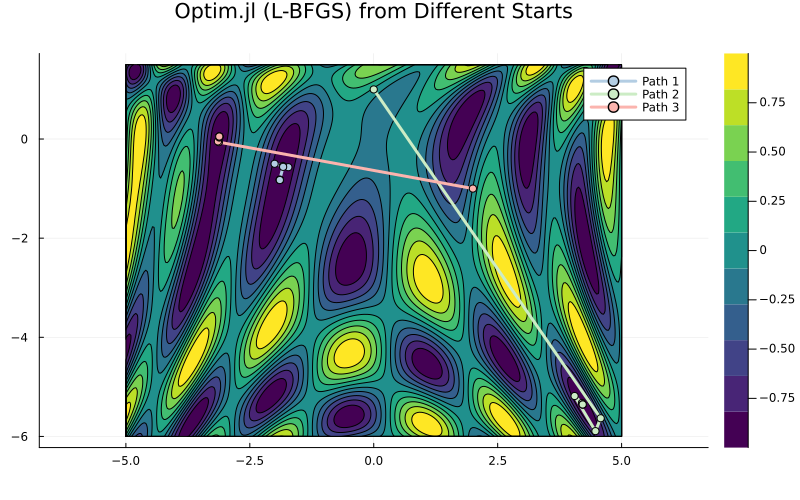

In [8]:
# Note: The optimizer will jump outside out initial domain
# Plot a larger domain to see these new minima
fplot(f, xlim=(-5,5), ylim=(-6,1.5), levels=10)
plot!(title="Optim.jl (L-BFGS) from Different Starts")

# The same starting points from our manual notebook
x0s = [[-2.0, -0.5], [0.0, 1.0], [2.0, -1.0]]

for (i, x0) in enumerate(x0s)
    # We'll explicitly choose Newton and ask it to save the trace
    res = optimize(f, g, x0,
                   method=LBFGS(),
                   store_trace=true,
                   extended_trace=true,
                   inplace=false)
    
    # Extract the path from the trace object
    # The trace is a vector of states; we get the position 'x' from each state's metadata
    xs = [s.metadata["x"] for s in res.trace]
    
    # Plot the path
    plot_path(xs, label="Path $i")
    
    # Print the final position (the 'minimizer')
    println("Path $i: Length=$(length(xs)), ||gradient|| = $(sqrt(sum(∇f(xs[end]).^2)))")
end
plot!()

# Note that Path 2 and 3 "jumped" to different minima